In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd
df = pd.read_csv(r"C:\Users\sidduling\Downloads\Copy of EastWestAirlines.csv")

In [5]:
df.sum()

ID#                    8057263
Balance              294331709
Qual_miles              576314
cc1_miles                 8236
cc2_miles                 4057
cc3_miles                 4048
Bonus_miles           68562240
Bonus_trans              46396
Flight_miles_12mo      1839763
Flight_trans_12           5493
Days_since_enroll     16470119
Award?                    1481
dtype: int64

In [6]:
df.isnull()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,False,False,False,False,False,False,False,False,False,False,False,False
3995,False,False,False,False,False,False,False,False,False,False,False,False
3996,False,False,False,False,False,False,False,False,False,False,False,False
3997,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.fillna(df.mean(), inplace=True)


In [8]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [9]:
df.shape

(2875, 12)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


In [12]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,2875.000000,2875.000000,2875.0,2875.000000,2875.0,2875.0,2875.000000,2875.000000,2875.000000,2875.000000,2875.000000,2875.000000
mean,2113.814609,46840.297739,0.0,1.829913,1.0,1.0,10872.930435,9.385739,57.085217,0.198609,3926.959652,0.279652
std,1151.821810,42611.722286,0.0,1.154373,0.0,0.0,13664.119401,7.753492,150.711569,0.484841,2044.017792,0.448906
min,1.000000,50.000000,0.0,1.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000
25%,1131.500000,15275.000000,0.0,1.000000,1.0,1.0,500.000000,2.000000,0.000000,0.000000,2154.500000,0.000000
50%,2167.000000,33327.000000,0.0,1.000000,1.0,1.0,4500.000000,9.000000,0.000000,0.000000,3805.000000,0.000000
75%,3101.500000,65980.500000,0.0,3.000000,1.0,1.0,17089.000000,15.000000,0.000000,0.000000,5566.000000,1.000000
max,4021.000000,202636.000000,0.0,5.000000,1.0,1.0,57382.000000,38.000000,767.000000,2.000000,8296.000000,1.000000


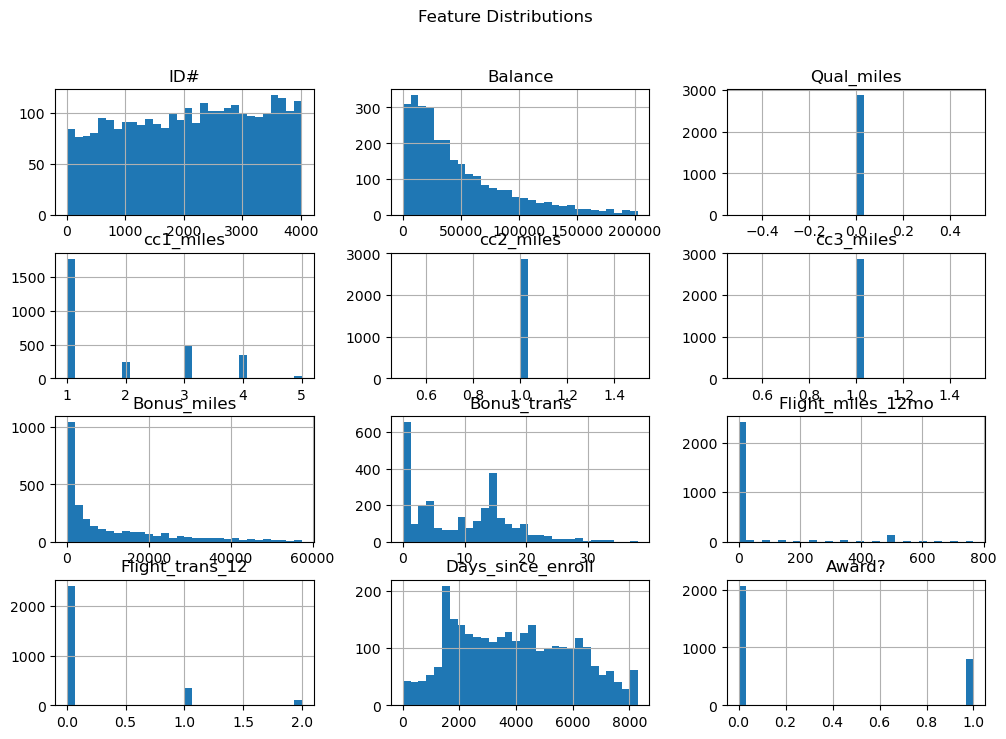

In [13]:
# Histogram
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions")
plt.show()


In [14]:
import warnings
warnings.filterwarnings("ignore")

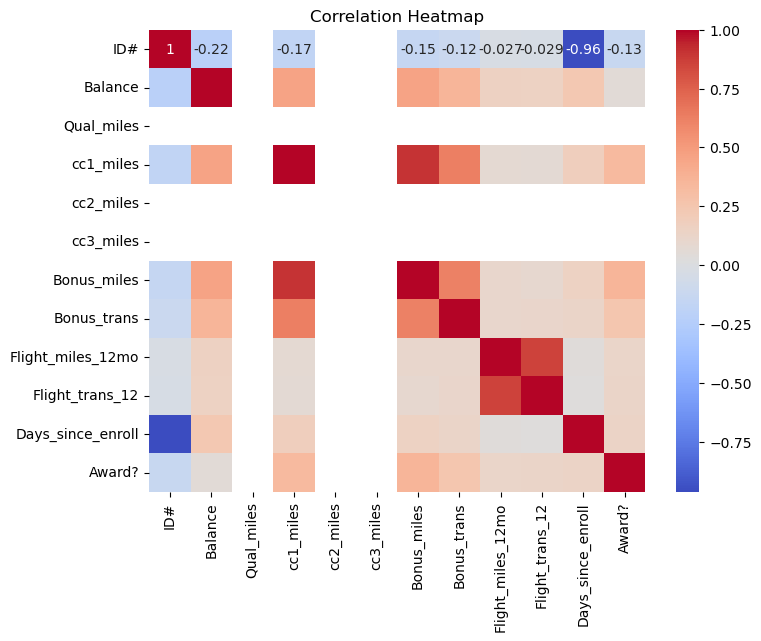

In [15]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [16]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [17]:
wcss = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

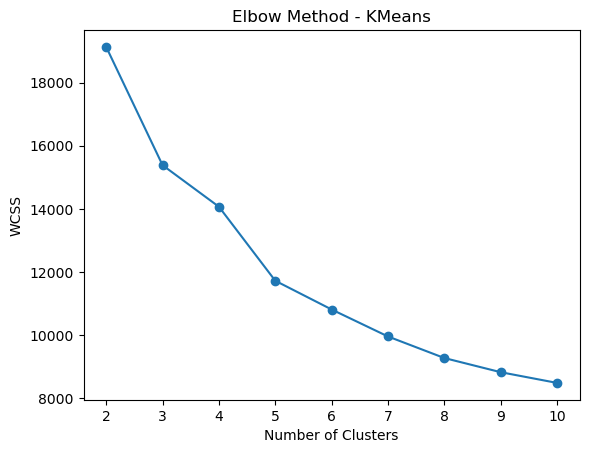

In [18]:

plt.plot(range(2, 11), wcss, marker='o')
plt.title("Elbow Method - KMeans")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [19]:
# Fit KMeans with chosen K
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)


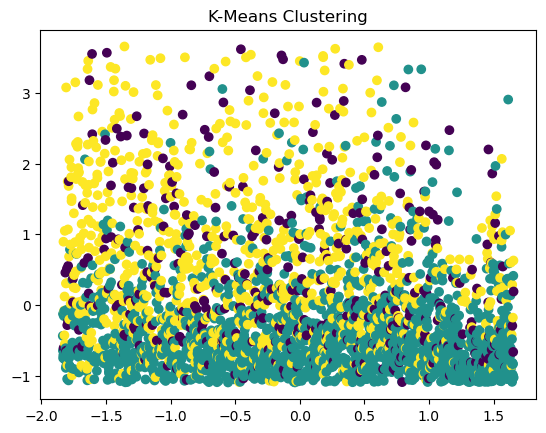

In [20]:
# Visualization
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_kmeans, cmap='viridis')
plt.title("K-Means Clustering")
plt.show()


In [21]:
# Evaluation
from sklearn.metrics import silhouette_score
sil_kmeans = silhouette_score(X_scaled, clusters_kmeans)
print(f"K-Means Silhouette Score: {sil_kmeans:.3f}")


K-Means Silhouette Score: 0.308


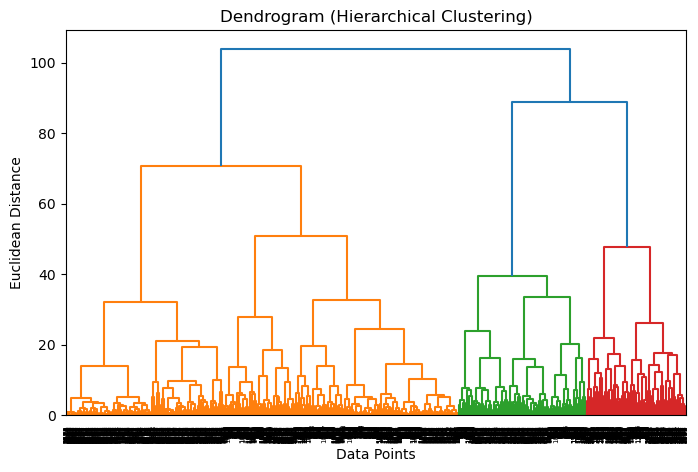

In [22]:
# Dendrogram
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(8, 5))
sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [23]:
# Fit Agglomerative Clustering
hier = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters_hier = hier.fit_predict(X_scaled)


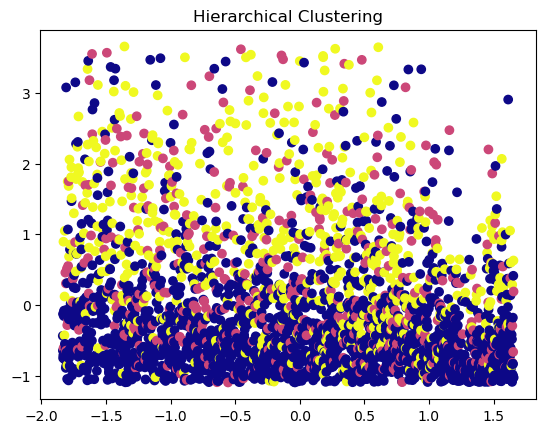

In [24]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_hier, cmap='plasma')
plt.title("Hierarchical Clustering")
plt.show()

In [25]:
# Evaluation
sil_hier = silhouette_score(X_scaled, clusters_hier)
print(f"Hierarchical Clustering Silhouette Score: {sil_hier:.3f}")


Hierarchical Clustering Silhouette Score: 0.279


In [26]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_scaled)

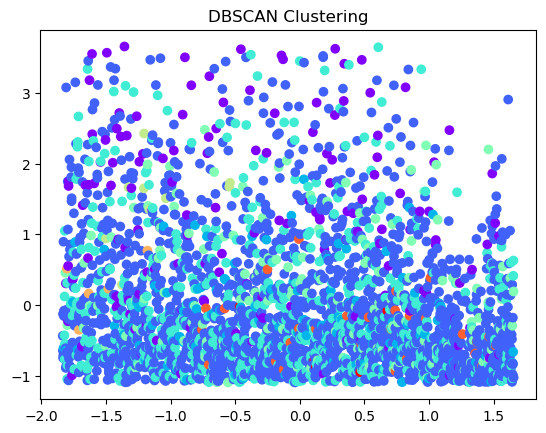

In [27]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_dbscan, cmap='rainbow')
plt.title("DBSCAN Clustering")
plt.show()

In [28]:
mask = clusters_dbscan != -1

In [29]:
if len(set(clusters_dbscan)) > 1:
    sil_dbscan = silhouette_score(X_scaled[mask], clusters_dbscan[mask])
else:
    sil_dbscan = np.nan
print(f"DBSCAN Silhouette Score: {sil_dbscan}")

DBSCAN Silhouette Score: 0.22510017066325644


In [30]:
results_df = pd.DataFrame({
    "Algorithm": ["K-Means", "Hierarchical", "DBSCAN"],
    "Silhouette Score": [sil_kmeans, sil_hier, sil_dbscan]
})

In [31]:
print("\nComparison of Clustering Algorithms:\n", results_df)



Comparison of Clustering Algorithms:
       Algorithm  Silhouette Score
0       K-Means          0.308303
1  Hierarchical          0.279363
2        DBSCAN          0.225100
